In [58]:
import re    
import nltk   
import string 
import warnings 
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sn

In [2]:
df = pd.read_csv("sentiments.csv")


In [3]:
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "Tweets"]
df.columns = DATASET_COLUMNS
df.head()

,target,ids,date,flag,user,Tweets
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df.drop(['ids','date','flag'],axis = 1,inplace = True)


In [6]:
df

,target,user,Tweets
0,0,scotthamilton,is upset that he can't update his Facebook by ...
1,0,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,ElleCTF,my whole body feels itchy and like its on fire
3,0,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,joy_wolf,@Kwesidei not the whole crew
...,...,...,...
1599994,4,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
df['Clean_Tweets'] = df['Tweets'].str.replace("@", "") 
df.head()

,target,user,Tweets,Clean_Tweets
0,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball. Mana...
2,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,Karoli,"@nationwideclass no, it's not behaving at all....","nationwideclass no, it's not behaving at all. ..."
4,0,joy_wolf,@Kwesidei not the whole crew,Kwesidei not the whole crew


In [8]:
df['Clean_Tweets'] = df['Clean_Tweets'].str.replace(r"http\S+", "") 
df.head()

,target,user,Tweets,Clean_Tweets
0,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball. Mana...
2,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,Karoli,"@nationwideclass no, it's not behaving at all....","nationwideclass no, it's not behaving at all. ..."
4,0,joy_wolf,@Kwesidei not the whole crew,Kwesidei not the whole crew


In [9]:
df['Clean_Tweets'] = df['Clean_Tweets'].str.replace("[^a-zA-Z]", " ") 
df.head()

,target,user,Tweets,Clean_Tweets
0,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,0,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Mana...
2,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no it s not behaving at all ...
4,0,joy_wolf,@Kwesidei not the whole crew,Kwesidei not the whole crew


In [10]:
stopwords=nltk.corpus.stopwords.words('english')

In [11]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [12]:
df['Clean_Tweets'] = df['Clean_Tweets'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

,target,user,Tweets,Clean_Tweets
0,0,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,0,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
2,0,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see
4,0,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


In [13]:
positive_data = df[df.target==4].iloc[:10000,:]
print(positive_data.shape)
negative_data = df[df.target==0].iloc[:10000,:]
print(negative_data.shape)

(10000, 4)
(10000, 4)


In [14]:
df = pd.concat([positive_data,negative_data],axis = 0)
print(df.shape)
df.head()

(20000, 4)


,target,user,Tweets,Clean_Tweets
799999,4,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800000,4,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
800001,4,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...
800002,4,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
800003,4,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.Clean_Tweets)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.user
data_dtm

,aa,aaa,aaaaaa,aaaaaaaa,aaaaaaaaaah,aaaaaaaaah,aaaaages,aaaaah,aaaaahhhh,aaaaand,...,zuzusu,zygoatsalami,zyrtec,zz,zzap,zzs,zzz,zzzz,zzzzzz,zzzzzzz
user,,,,,,,,,,,,,,,,,,,,,
ersle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
becca210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wingman29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
katarinka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_EmilyYoung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gia_revenge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
matmurray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lexabuckets,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
s = df.Clean_Tweets[df.target==4]

In [17]:
s.str.cat(sep=' ')

'love health uandpets u guys r best im meeting one besties tonight cant wait girl talk darealsunisakim thanks twitter add sunisa got meet hin show dc area sweetheart sick really cheap hurts much eat real food plus friends make soup lovesbrooklyn effect everyone productoffear tell burst laughing really loud thanks making come sulk r keith hill thans response ihad already find answer keepinupwkris jealous hope great time vegas like acm love show tommcfly ah congrats mr fletcher finally joining twitter e voip responded stupid cat helping type forgive errors crazy day school hours straiiight watch hills spencerpratt told ha happy birthday jb naughtyhaughty forget two half men love show nileyjileyluver haha worry get hang soundwav least one feeling lost may cause many later usual nights already addicting lutheranlucciol make sure dm post link video lt lol gt miss better get permission blessing first added tweetie new iphone michellardi really know think globe yeah sana gumaling na ko para a

In [18]:
d = df.Clean_Tweets[df.target==0]

In [19]:
d.str.cat(sep=' ')

'upset update facebook texting might cry result school today also blah kenichan dived many times ball managed save rest go bounds whole body feels itchy like fire nationwideclass behaving mad see kwesidei whole crew need hug loltrish hey long time see yes rains bit bit lol fine thanks tatiana k nope twittera que muera spring break plain city snowing pierced ears caregiving bear watch thought ua loss embarrassing octolinz counts idk either never talk anymore smarrison would first gun really though zac snyder doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive always wanted see rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day get much done one friend called asked meet mid valley today time sigh angry barista baked cake ated week going hoped blagh class tomorrow hate call wake people going cry sleep watching marley im sad miss lilly ooooh lol l

In [20]:
from textblob import TextBlob


In [21]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Clean_Tweets'].apply(pol)
df['subjectivity'] = df['Clean_Tweets'].apply(sub)
df

,target,user,Tweets,Clean_Tweets,polarity,subjectivity
799999,4,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best,0.750000,0.450000
800000,4,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...,0.000000,0.000000
800001,4,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...,0.200000,0.200000
800002,4,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...,0.021429,0.514286
800003,4,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone,0.000000,0.000000
...,...,...,...,...,...,...
9995,0,gia_revenge,stupid dvds stuffing up the good bits in jaws.,stupid dvds stuffing good bits jaws,-0.050000,0.800000
9996,0,matmurray,@Dandy_Sephy No. Only close friends and family...,dandy sephy close friends family afraid work c...,-0.600000,0.900000
9997,0,lexabuckets,CRAP! After looking when I last tweeted... WHY...,crap looking last tweeted early like,-0.233333,0.388889
9998,0,AmberKarley,Its Another Rainboot day,another rainboot day,0.000000,0.000000


In [22]:
positive_data

,target,user,Tweets,Clean_Tweets
799999,4,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800000,4,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
800001,4,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...
800002,4,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
800003,4,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone
...,...,...,...,...
809994,4,maricelarios,Morning! I have slacked for two days in twitte...,morning slacked two days twittering finished g...
809995,4,Codepope,@bensummers Isn't that sweet of them.... Altru...,bensummers sweet altruism finest
809996,4,christyku,"@jakrose Um, milk *fathers* don't have udders....",jakrose um milk fathers udders quot milk mothe...
809997,4,EdRoberts,@zenaweist They could also tweet @BeccaRoberts,zenaweist could also tweet beccaroberts


In [23]:
positive_data['polarity'] = positive_data['Clean_Tweets'].apply(pol)
positive_data['subjectivity'] = positive_data['Clean_Tweets'].apply(sub)
df

,target,user,Tweets,Clean_Tweets,polarity,subjectivity
799999,4,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best,0.750000,0.450000
800000,4,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...,0.000000,0.000000
800001,4,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...,0.200000,0.200000
800002,4,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...,0.021429,0.514286
800003,4,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone,0.000000,0.000000
...,...,...,...,...,...,...
9995,0,gia_revenge,stupid dvds stuffing up the good bits in jaws.,stupid dvds stuffing good bits jaws,-0.050000,0.800000
9996,0,matmurray,@Dandy_Sephy No. Only close friends and family...,dandy sephy close friends family afraid work c...,-0.600000,0.900000
9997,0,lexabuckets,CRAP! After looking when I last tweeted... WHY...,crap looking last tweeted early like,-0.233333,0.388889
9998,0,AmberKarley,Its Another Rainboot day,another rainboot day,0.000000,0.000000


In [24]:
positive_data.describe()

,target,polarity,subjectivity
count,10000.0,10000.000000,10000.000000
mean,4.0,0.194598,0.391797
std,0.0,0.310168,0.334174
min,4.0,-1.000000,0.000000
25%,4.0,0.000000,0.000000
50%,4.0,0.100000,0.416667
75%,4.0,0.400000,0.647222
max,4.0,1.000000,1.000000


In [25]:
negative_data['polarity'] = negative_data['Clean_Tweets'].apply(pol)
negative_data['subjectivity'] = negative_data['Clean_Tweets'].apply(sub)
negative_data

,target,user,Tweets,Clean_Tweets,polarity,subjectivity
0,0,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...,0.000000,0.000000
1,0,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...,0.500000,0.500000
2,0,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,0.200000,0.400000
3,0,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,-0.625000,1.000000
4,0,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew,0.200000,0.400000
...,...,...,...,...,...,...
9995,0,gia_revenge,stupid dvds stuffing up the good bits in jaws.,stupid dvds stuffing good bits jaws,-0.050000,0.800000
9996,0,matmurray,@Dandy_Sephy No. Only close friends and family...,dandy sephy close friends family afraid work c...,-0.600000,0.900000
9997,0,lexabuckets,CRAP! After looking when I last tweeted... WHY...,crap looking last tweeted early like,-0.233333,0.388889
9998,0,AmberKarley,Its Another Rainboot day,another rainboot day,0.000000,0.000000


In [26]:
negative_data.describe()

,target,polarity,subjectivity
count,10000.0,10000.000000,10000.000000
mean,0.0,-0.020823,0.382821
std,0.0,0.324524,0.350242
min,0.0,-1.000000,0.000000
25%,0.0,-0.145833,0.000000
50%,0.0,0.000000,0.383333
75%,0.0,0.100000,0.666667
max,0.0,1.000000,1.000000


In [27]:
index_names = df[ (df['polarity'] > 0) & (df['target'] == 0)].index
df.drop(index_names, inplace = True)
df.drop(df[df['target'] == 4].index, inplace = True)
df

,target,user,Tweets,Clean_Tweets,polarity,subjectivity
0,0,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...,0.000000,0.000000
3,0,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,-0.625000,1.000000
5,0,mybirch,Need a hug,need hug,0.000000,0.000000
7,0,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana k nope,0.000000,0.000000
8,0,mimismo,@twittera que me muera ?,twittera que muera,0.000000,0.000000
...,...,...,...,...,...,...
9995,0,gia_revenge,stupid dvds stuffing up the good bits in jaws.,stupid dvds stuffing good bits jaws,-0.050000,0.800000
9996,0,matmurray,@Dandy_Sephy No. Only close friends and family...,dandy sephy close friends family afraid work c...,-0.600000,0.900000
9997,0,lexabuckets,CRAP! After looking when I last tweeted... WHY...,crap looking last tweeted early like,-0.233333,0.388889
9998,0,AmberKarley,Its Another Rainboot day,another rainboot day,0.000000,0.000000


In [28]:
df.describe()

,target,polarity,subjectivity
count,6939.0,6939.000000,6939.000000
mean,0.0,-0.167018,0.319344
std,0.0,0.244636,0.373433
min,0.0,-1.000000,0.000000
25%,0.0,-0.300000,0.000000
50%,0.0,0.000000,0.050000
75%,0.0,0.000000,0.655556
max,0.0,0.000000,1.000000


In [29]:
negative_data = df

In [30]:
negative_data

,target,user,Tweets,Clean_Tweets,polarity,subjectivity
0,0,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...,0.000000,0.000000
3,0,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,-0.625000,1.000000
5,0,mybirch,Need a hug,need hug,0.000000,0.000000
7,0,2Hood4Hollywood,@Tatiana_K nope they didn't have it,tatiana k nope,0.000000,0.000000
8,0,mimismo,@twittera que me muera ?,twittera que muera,0.000000,0.000000
...,...,...,...,...,...,...
9995,0,gia_revenge,stupid dvds stuffing up the good bits in jaws.,stupid dvds stuffing good bits jaws,-0.050000,0.800000
9996,0,matmurray,@Dandy_Sephy No. Only close friends and family...,dandy sephy close friends family afraid work c...,-0.600000,0.900000
9997,0,lexabuckets,CRAP! After looking when I last tweeted... WHY...,crap looking last tweeted early like,-0.233333,0.388889
9998,0,AmberKarley,Its Another Rainboot day,another rainboot day,0.000000,0.000000


In [31]:
negative_data.describe()

,target,polarity,subjectivity
count,6939.0,6939.000000,6939.000000
mean,0.0,-0.167018,0.319344
std,0.0,0.244636,0.373433
min,0.0,-1.000000,0.000000
25%,0.0,-0.300000,0.000000
50%,0.0,0.000000,0.050000
75%,0.0,0.000000,0.655556
max,0.0,0.000000,1.000000


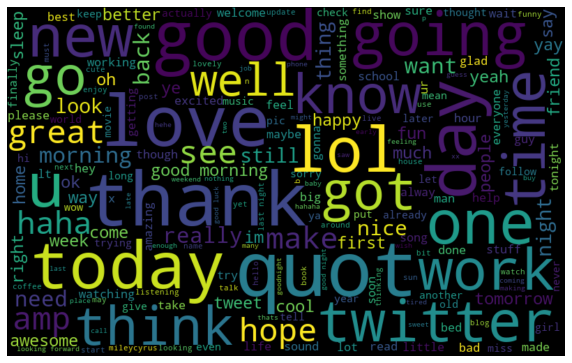

In [32]:
positive_words = ' '.join([text for text in positive_data['Clean_Tweets']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

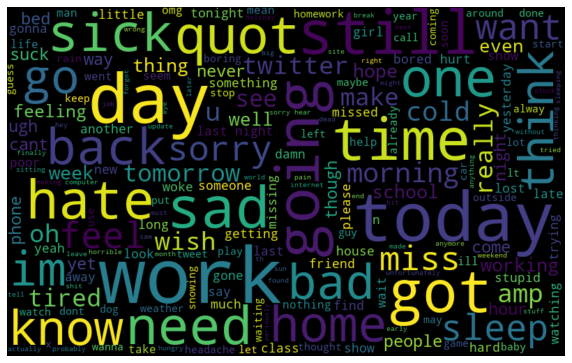

In [33]:
negative_words =' '.join([text for text in negative_data['Clean_Tweets'][negative_data['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [39]:
df = pd.concat([positive_data,negative_data],axis = 0)
print(df.shape)

(16939, 6)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [41]:
count_vectorizer = CountVectorizer(stop_words='english')
cvt = count_vectorizer.fit_transform(df['Clean_Tweets'])
cvt.shape

(16939, 24010)

In [42]:
y= df.target.values

In [52]:
X_train,X_test,y_train,y_test = train_test_split(cvt,y , test_size=.4,stratify=df['target'], random_state=42)

In [53]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)


In [54]:
print(accuracy_score(prediction_rf,y_test))


0.7703659976387249


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction_rf)

In [56]:
cm

array([[2049,  727],
       [ 829, 3171]], dtype=int64)

<AxesSubplot:>

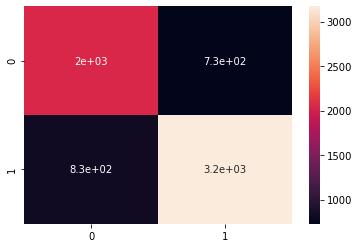

In [59]:
sn.heatmap(cm, annot=True)